In [3]:
%load_ext autoreload
%autoreload 2

from face_tally.ml_logic.image_prediction import predict_bounding_boxes, create_image
from ultralytics import YOLO
import numpy as np
from PIL import Image
from pillow_heif import register_heif_opener
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

from face_tally.ml_logic.image_prediction import predict_bounding_boxes, crop_image_faces
from face_tally.params import *
from face_tally.ml_logic.model import get_model
from rembg import remove
import os


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
model, _ = await get_model(MODEL_SOURCE)


✅ Loaded weights from the comet ML


In [5]:
character = Image.open('trial_images/random_person_pic.jpg')
# output = remove(character)
character_array = np.array(character)
model.predict(character_array)

bb = predict_bounding_boxes(character_array, model, "COMET")
faces = crop_image_faces(character_array, bb)



0: 320x640 1 0, 390.0ms
Speed: 16.5ms preprocess, 390.0ms inference, 16.3ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 0, 120.8ms
Speed: 2.3ms preprocess, 120.8ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)


In [87]:
def crop_image(original_image_array: np.array, biggest_bound_box: dict) -> np.array:
    """
    Takes both:
    - The original image array
    - The result from the bounding boxes

    And returns an image with both elements in array format
    """

    faces_list = []

    # Create an OpenCV image from the numeric array
    opencv_image = cv2.cvtColor(original_image_array, cv2.COLOR_RGB2BGR)
    print(opencv_image.shape)

    coordinates = biggest_bound_box[0]["Coordinates"]

    # Annotate bounding boxes on the OpenCV image
    height_face = (coordinates[3]-coordinates[1])
    lenght_face = (coordinates[2]-coordinates[0])

    x1 = int(max(0, coordinates[0] - lenght_face * 0.75))
    x2 = int(min(opencv_image.shape[1], coordinates[2] + lenght_face * 0.75))

    y1 = int(max(0, coordinates[1] - height_face * 0.50))
    y2 = int(min(opencv_image.shape[0], coordinates[3] + height_face * 1.35))

    face = opencv_image[ y1: y2, x1: x2]
    # face = opencv_image[int(coordinates[1]):int(coordinates[3]),
    #                     int(coordinates[0]):int(coordinates[2])]

    face_colored = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

    faces_list.append(face_colored)

    # Display or save the annotated image as needed
    return faces_list



0: 320x640 1 0, 169.0ms
Speed: 6.1ms preprocess, 169.0ms inference, 1.7ms postprocess per image at shape (1, 3, 320, 640)
(400, 800, 3)


[354.8620300292969, 34.851261138916016, 435.1517028808594, 113.89755249023438]

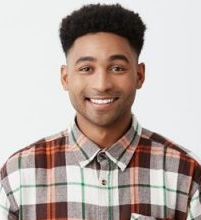

In [88]:
bbs = predict_bounding_boxes(character_array, model)
croped_image = crop_images(character_array, bbs)
display(bbs[0]["Coordinates"])

img = Image.fromarray(croped_image[0])
# img = Image.fromarray(croped_images[0])
img


In [21]:
print(len(croped_images))
len(croped_images[0])


1


109